In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix



In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df = pd.concat([df_train, df_train])
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  4000 non-null   int64  
 1   blue           4000 non-null   int64  
 2   clock_speed    4000 non-null   float64
 3   dual_sim       4000 non-null   int64  
 4   fc             4000 non-null   int64  
 5   four_g         4000 non-null   int64  
 6   int_memory     4000 non-null   int64  
 7   m_dep          4000 non-null   float64
 8   mobile_wt      4000 non-null   int64  
 9   n_cores        4000 non-null   int64  
 10  pc             4000 non-null   int64  
 11  px_height      4000 non-null   int64  
 12  px_width       4000 non-null   int64  
 13  ram            4000 non-null   int64  
 14  sc_h           4000 non-null   int64  
 15  sc_w           4000 non-null   int64  
 16  talk_time      4000 non-null   int64  
 17  three_g        4000 non-null   int64  
 18  touch_sc

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
information = pd.DataFrame({"Nama fitur": df.columns,
                            "Jumlah Value Unik":df.nunique(),
                            "Missing Value":df.isnull().sum(),
                            "Type kolom":df.dtypes})

information

,Nama fitur,Jumlah Value Unik,Missing Value,Type kolom
battery_power,battery_power,1094,0,int64
blue,blue,2,0,int64
clock_speed,clock_speed,26,0,float64
dual_sim,dual_sim,2,0,int64
fc,fc,20,0,int64
four_g,four_g,2,0,int64
int_memory,int_memory,63,0,int64
m_dep,m_dep,10,0,float64
mobile_wt,mobile_wt,121,0,int64
n_cores,n_cores,8,0,int64


<ipython-input-6-1ef55d927382>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[Categorical[i]], palette="rocket", legend=False)
<ipython-input-6-1ef55d927382>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[Categorical[i]], palette="rocket", legend=False)
<ipython-input-6-1ef55d927382>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[Categorical[i]], palette="rocket", legend=False)
<ipython-input-6-1ef55d927382>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

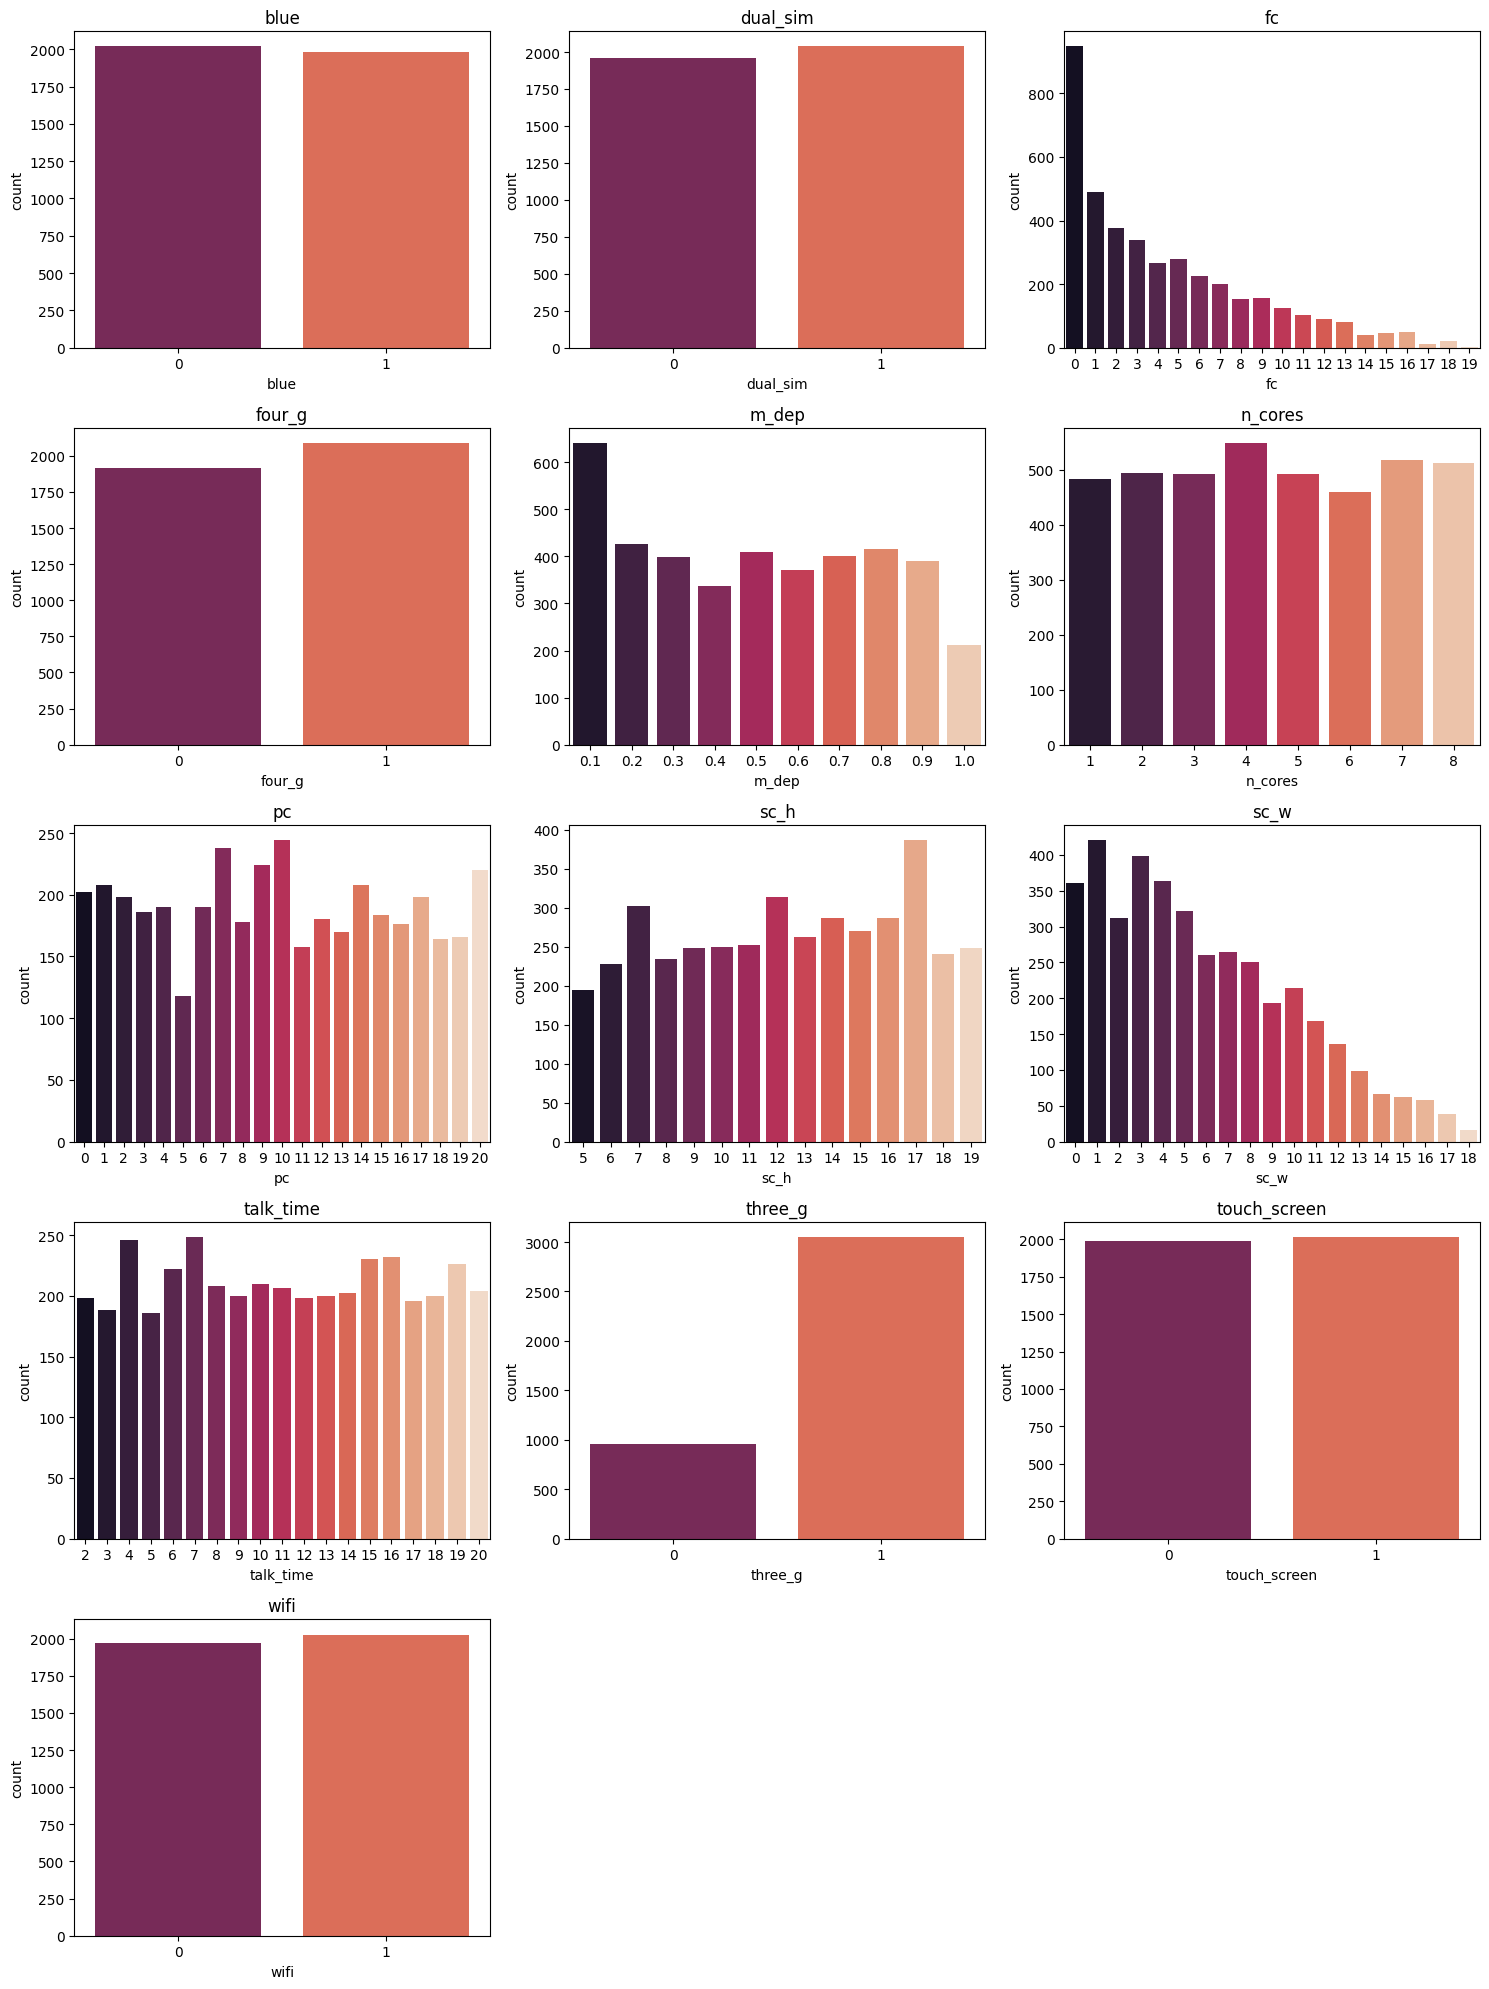

In [6]:
Categorical=list(df[['blue','dual_sim','fc','four_g',
                      'm_dep','n_cores','pc','sc_h','sc_w',
                      'talk_time','three_g','touch_screen','wifi']])

plt.figure(figsize=(15,20))

for i in range(len(Categorical)):
  plt.subplot(5, 3, i+1)
  plt.title(Categorical[i])
  sns.countplot(x=df[Categorical[i]], palette="rocket", legend=False)


plt.tight_layout()
plt.show()


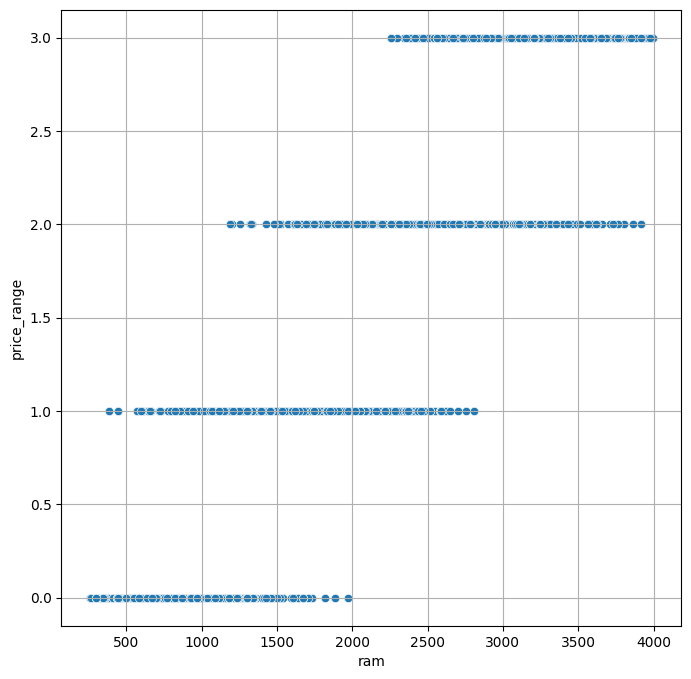

In [7]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['ram'], y=df['price_range'], data=df)

plt.grid()
plt.show()


<Axes: >

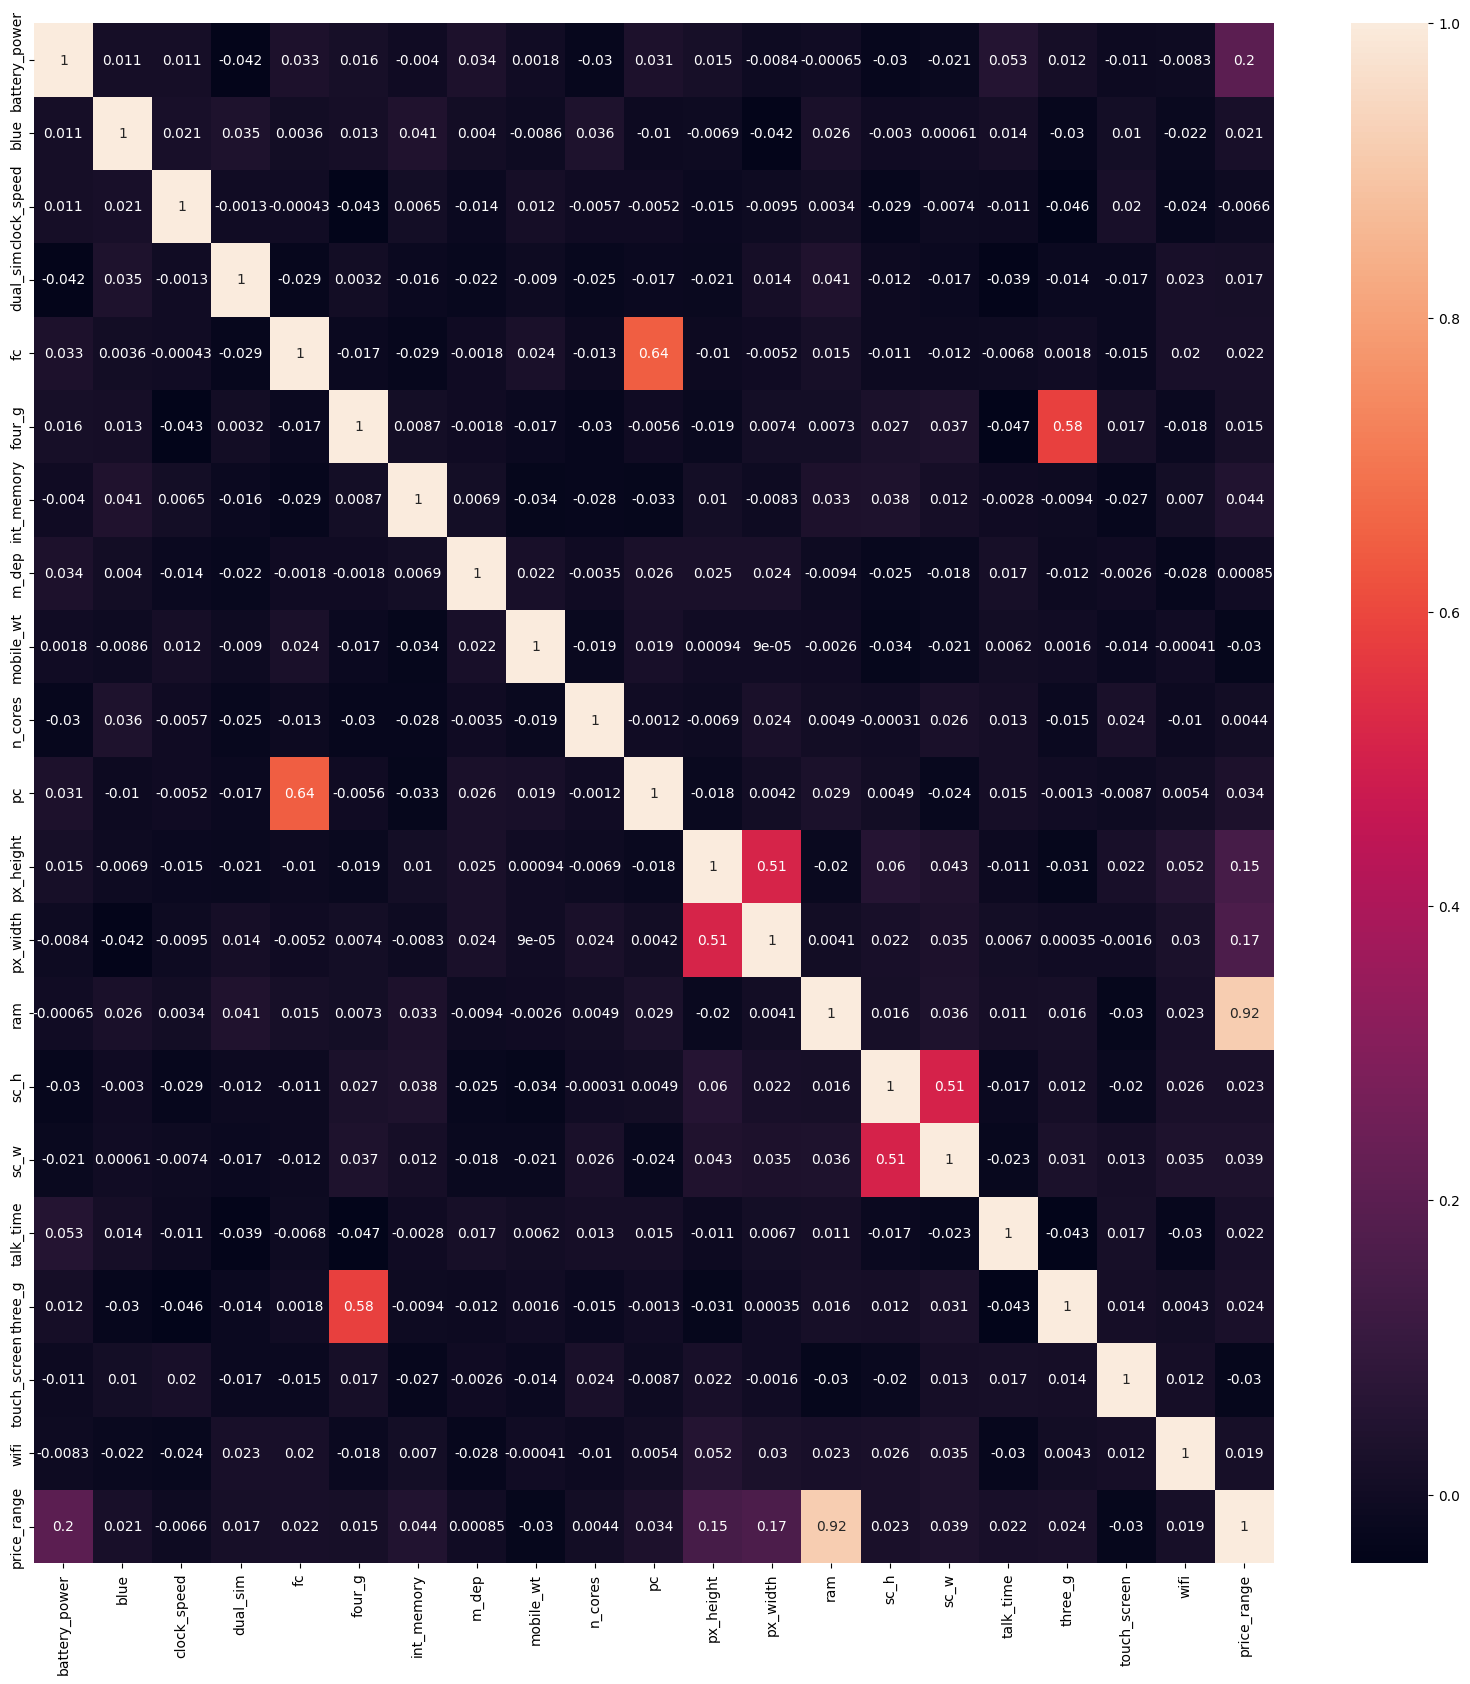

In [8]:
corr = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

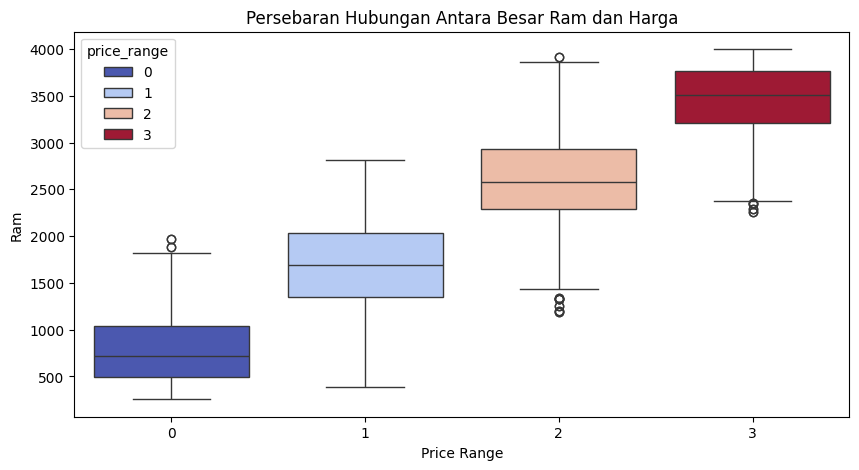

In [9]:
plt.figure(figsize=(10, 5))
plt.title("Persebaran Hubungan Antara Besar Ram dan Harga")
sns.boxplot(x=df['price_range'], y=df['ram'], hue=df['price_range'], palette='coolwarm')
plt.xlabel('Price Range')
plt.ylabel('Ram')
plt.show()

Text(0.5, 1.0, 'Korelasi Setiap Fitur Dengan price_range')

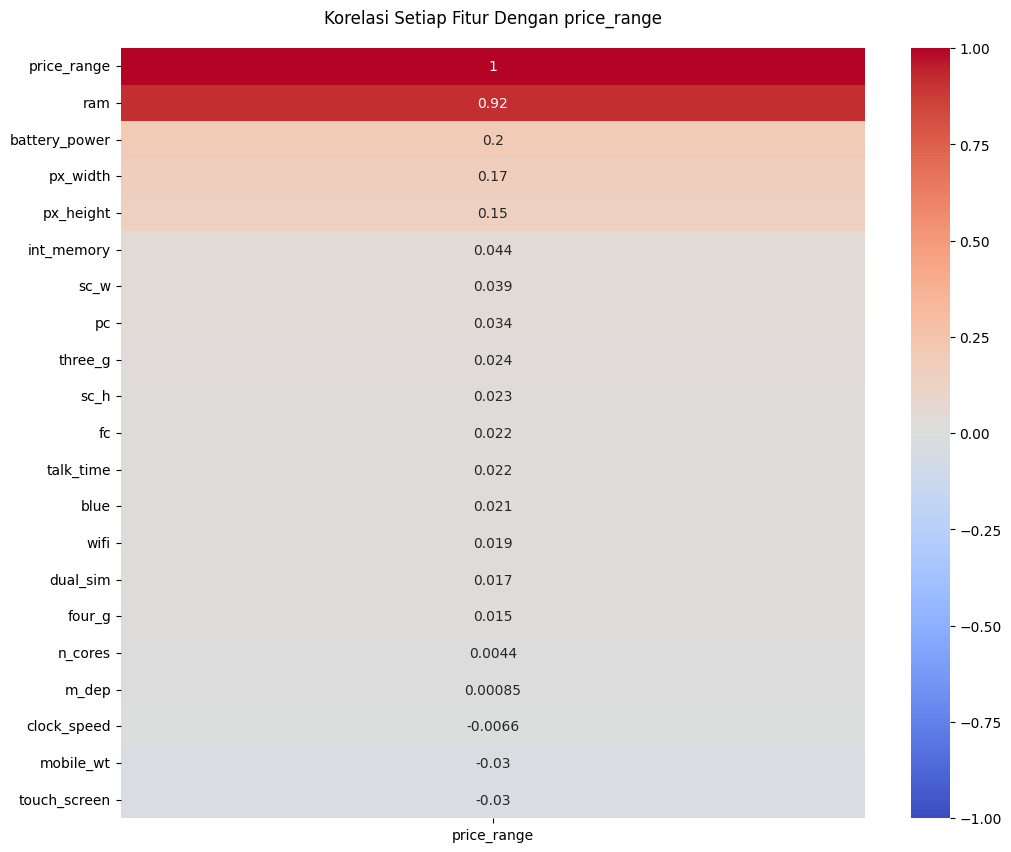

In [10]:
plt.figure(figsize=(12, 10), dpi = 100)

heatmap = sns.heatmap(df.corr()[['price_range']]
                      .sort_values(by='price_range'
                      , ascending = False)
                      , vmin = -1
                      , vmax = 1
                      , annot = True
                      , cmap = 'coolwarm')

heatmap.set_title("Korelasi Setiap Fitur Dengan price_range", pad = 18)

In [11]:
X = df.iloc[:, [0, 13]].values
y = df.iloc[:, 20].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVC(random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


In [12]:
acc = classifier.score(X_train, y_train)
print("Accuracy:", acc*100,"%")


Accuracy: 83.1 %


In [13]:
acc = classifier.score(X_test,y_test)
print("Accuracy:", acc*100,"%")

Accuracy: 82.69999999999999 %


<ipython-input-14-b376e3fe420b>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


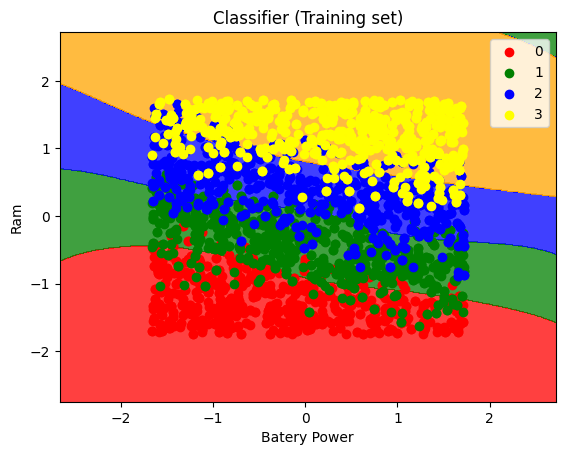

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'yellow'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Batery Power')
plt.ylabel('Ram')
plt.legend()
plt.show()

In [15]:
X = df.iloc[:, [0, 13]].values
y = df.iloc[:, 20].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVC(kernel='poly' ,random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc = classifier.score(X_test,y_test)
print("Accuracy:", acc*100,"%")

Accuracy: 82.89999999999999 %


<ipython-input-16-b376e3fe420b>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


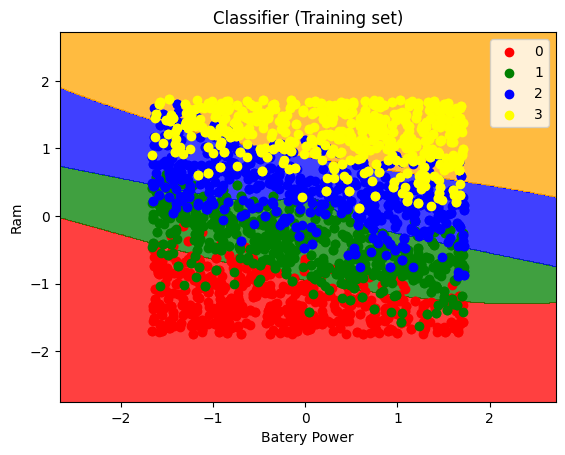

In [16]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'yellow'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Batery Power')
plt.ylabel('Ram')
plt.legend()
plt.show()

In [17]:
X = df.iloc[:, [0, 13]].values
y = df.iloc[:, 20].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVC(kernel='linear' ,random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc = classifier.score(X_test,y_test)
print("Accuracy:", acc*100,"%")

Accuracy: 83.8 %


<ipython-input-18-b376e3fe420b>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


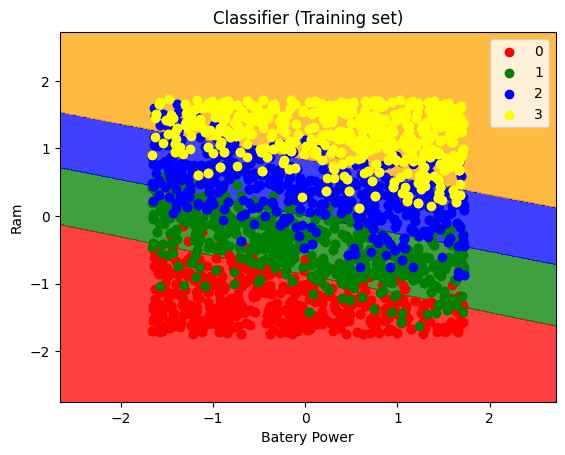

In [18]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'yellow'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Batery Power')
plt.ylabel('Ram')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.838


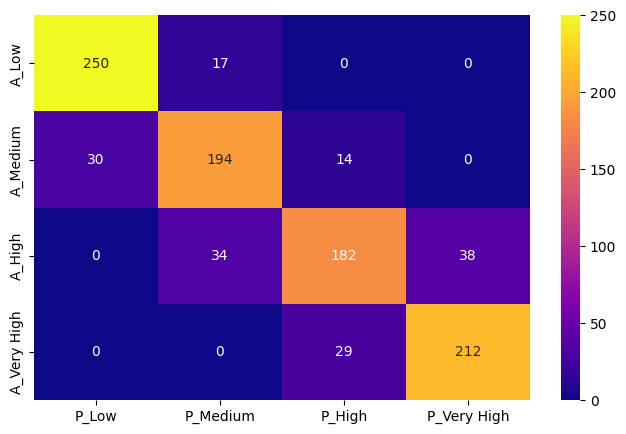

In [25]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="plasma")
plt.show()

In [27]:
from sklearn.metrics import classification_report


result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       267
           1       0.79      0.82      0.80       238
           2       0.81      0.72      0.76       254
           3       0.85      0.88      0.86       241

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000

